In [2]:
from preamble import *
%matplotlib inline

## 5. Model Evaluation and Improvement

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
print("X.shape:", X.shape)
print("y.shape:", y.shape)

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)

# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

X.shape: (100, 2)
y.shape: (100,)
Test set score: 0.88


### 5.1 Cross-Validation
- 교차 검증
  - 데이터를 여러 번 반복해서 나누어 모델 학습
- K-Fold cross-vailidation
  - Fold: 원본 데이터에 대한 부분 집합
  - K로는 5나 10을 주로 사용
    - 첫번째 모델은 첫번째 fold를 테스트 데이터로 사용하고 나머지를 훈련 데이터로 사용
    - 두번째 모델은 두번째 fold를 테스트 데이터로 사용하고 나머지를 훈련 데이터로 사용
    - 세번째 모델은...

2.1.2


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:2669: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


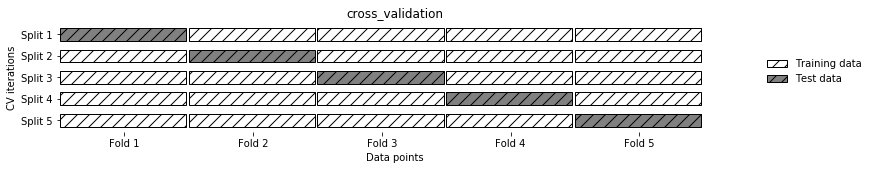

In [4]:
import matplotlib
print(matplotlib.__version__)

mglearn.plots.plot_cross_validation()

#### 5.1.1 Cross-Validation in scikit-learn
- scikit-learn의 교차 검증
  - model_selection.cross_val_score(estimator, X, y=None, cv=None) 함수 사용
    - estimator
      - estimator object implementing ‘fit’
      - The object to use to fit the data.
    - X
      - The data to fit.
    - y
      - The target variable to try to predict in the case of supervised learning.
    - cv
      - K-Fold의 K값 (기본 값: 3)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
print("iris.data.shape:", iris.data.shape)
print("iris.target.shape:", iris.target.shape)

logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

iris.data.shape: (150, 4)
iris.target.shape: (150,)
Cross-validation scores: [0.961 0.922 0.958]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.    0.967 0.933 0.9   1.   ]


- 교차 검증의 정확도: 각 교차 검증 정확도의 평균값 사용

In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### 5.1.2 Benefits of Cross-Validation
- 기존 train_test_split 방법만 사용하는 경우
  - 확보한 원본 데이터 중 일부의 데이터는 훈련 데이터로 활용하지 않으면서 모델을 구성함.
- cross_val_score 함수를 사용하는 경우
  - 데이터를 고르게 사용하여 fit을 하고 score를 구하기 때문에 모델의 성능을 좀 더 정확히 측정할 수 있음
  - 새로은 테스트 데이터의 예측 정확도에 대하여 최악과 최선의 경우를 짐작할 수 있음 
  - [주의] **cross_val_score가 직접 모델을 구성하는 방법은 아님!**
    - 즉, <u>이 함수를 호출하면 내부적으로 K번 모델을 구성하지만, 그러한 모델들은 평가의 목적으로만 활용됨.</u>

### 5.1.3 Stratified K-Fold cross-validation and other strategies
- 계층별 K-Fold 교차 검증
  - 각 Fold안의 클래스 비율이 전체 원본 데이터셋에 있는 클래스 비율과 동일하도록 맞춤
  - 즉, 원본 데이터셋에서 클래스 A가 90%, 클래스 B가 10% 비율이라면, 계층별 K-Fold 교차 검증에서 각 K개의 Fold안에는 클래스 A가 90%, 클래스 B가 10% 비율이 됨.
- scikit-learn의 cross_val_score 기본 설정
  - 분류모델: StratifiedKFold를 사용하여 기본적으로 계층별 K-Fold 교차 검증 수행
  - 회귀모델: 단순한 KFold를 사용하여 계층별이 아닌 기본 K-Fold 교차 검증 수행
    - 대신 회귀모델에서는 KFold를 사용할 때 shuffle 매개변수를 True로 지정하여 폴드를 나누기 전에 무작위로 데이터를 섞는 작업 추천

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\ProgramData\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
C:\ProgramData\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
C:\ProgramData\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
C:\ProgramData\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:163: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated u

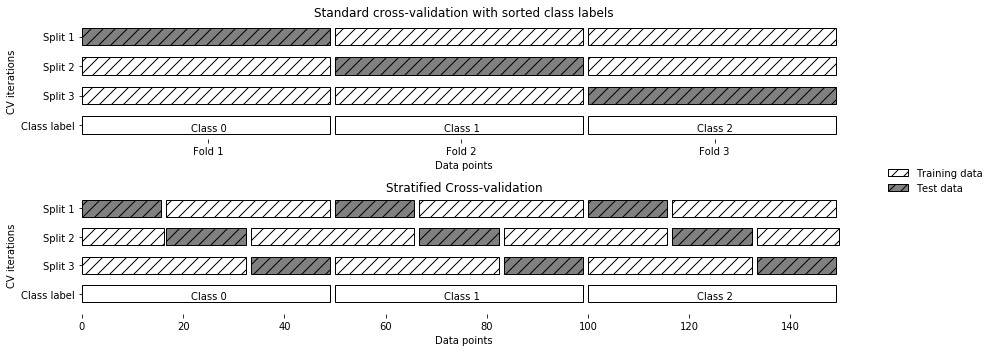

In [9]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation
- 기본적으로...
  - 분류: StratifiedKFold가 사용됨
  - 회귀: KFold가 사용됨
- 하지만, 때때로 분류에 KFold가 사용되어야 할 필요도 있음
  - 다른 사람이 이미 수행한 사항을 재현해야 할 때
  - StratifiedKFold가 아닌 KFold를 생성하여 cross_val_score()의 cv 인자에 할당

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) #교차 검증 분할기의 역할 수행

In [11]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.    0.933 0.433 0.967 0.433]


- 이런 경우 3-Fold를 사용하면 데이터 타겟 레이블 분포 특성상 성능이 매우 나쁠 수 있음

In [12]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


- 해결책
  - KFold를 만들 때 shuffle=True를 통해 데이터를 임의로 섞음.
  - random_state=0을 주면 추후 그대로 재현이 가능

In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.9  0.96 0.96]


#### Leave-one-out cross-validation (LOOCV)
- Fold 하나에 하나의 샘플이 들어 있는 Stratified k-Fold 교차 검증
  - 즉, 각각의 반복에서 테스트 데이터에 하나의 샘플만 존재
  - 데이터셋이 클 때 시간이 매우 오래 걸림
  - 작은 데이터셋에 대해서는 일반적인 상황에 대한 거의 확실한 score 값을 얻을 수 있음.

In [14]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### Shuffle-split cross-validation
- 임의 분할 교차 검증
  - model_selection.SuffleSplit(n_splits=10, test_size='default') or model_selection.StratifiedSuffleSplit(n_splits=10, test_size='default')
    - n_splits: 10
      - 분할의 개수
    - test_size 만큼의 테스트 셋트를 만들도록 분할
      - test_size의 기본값: 0.1
  - 보통 test_size 값만 설정하며, 추가적으로 train_size 도 설정 가능
    - 이런 경우 전체 데이터 집합 중 일부만 훈련과 테스트에 사용할 수 있음
    - 대규모 데이터에 유용
  - test_size, train_size
    - 정수: 데이터 포인트의 개수
    - 실수: 데이터 포인트 비율<br/><br/>

- 아래 그림 예제
  - 전체 데이터 셈플 개수: 10
  - train_size = 5
  - test_size = 2
  - n_splits = 4

C:\ProgramData\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


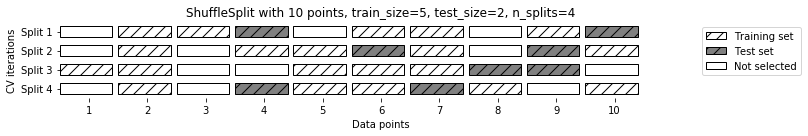

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits=10, test_size=.5, train_size=.5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))


Cross-validation scores:
[0.92  0.933 0.947 0.947 0.933 0.893 0.907 0.933 0.907 0.853]
Mean accuracy: 0.92


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(n_splits=10, test_size=.5, train_size=.5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))


Cross-validation scores:
[0.973 0.96  0.933 0.947 0.96  0.92  0.96  0.893 0.973 0.96 ]
Mean accuracy: 0.95


##### Cross-validation with groups
- 임의의 그룹에 속한 데이터 전체를 훈련 집합 또는 테스트 집합에 넣을 때 사용
- 테스트 데이터가 때때로 완전히 새로운 데이터가 되어야 할 필요 있음
- model_selection.GroupKFold
  - 그룹핑을 통하여 훈련 데이터 셋트와 테스트 데이터 셋트를 완벽히 분리하기 위해 사용
  - group 배열
    - 각 데이터 포인트 별로 그룹 index 지정 필요
    - 배열 내에 index 지정을 통해 훈련 데이터와 테스트 데이터를 랜덤하게 구성할 때 분리되지 말아야 할 그룹을 지정
    - 타깃 레이블과 혼동하면 안됨
- 더 나은 방법
  - 이 방법대신 model_selection.train_test_split을 통해 처음 부터 테스트 데이터를 미리 분리하는 것이 더 좋음.

C:\ProgramData\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
C:\ProgramData\Anaconda3\lib\site-packages\mglearn\plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


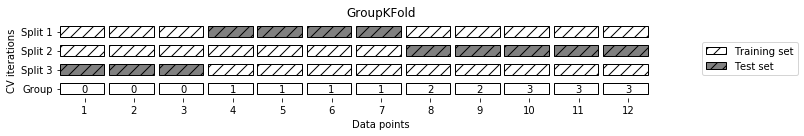

In [18]:
mglearn.plots.plot_group_kfold()

In [19]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong to the same group,
# then the next four, etc
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Cross-validation scores:
[0.75  0.8   0.667]
Mean accuracy: 0.74


### 5.2 Grid Search
- 모델 매개변수 튜닝을 통한 일반화 성능 개선 
- 가장 널리 사용되는 방법은 Grid Search (그리드 탐색)
  - 관심있는 매개변수들을 대상으로 모든 조합을 시도함.
    
#### 5.2.1 Simple Grid-Search
- SVC 모델에서 가장 중요한 매개변수는 gamma, C
- 그리드 탐색 범위 설정 예
  - gamma: [0.001, 0.01, 0.1, 1, 10, 100]
  - C: [0.001, 0.01, 0.1, 1, 10, 100]
  - 총 6x6=36개의 조합에 대하여 반복적으로 새로운 모델 생성 및 평가
  - 가장 좋은 성능을 보여주는 gamma와 C의 조합을 찾음

<table>
    <tr>
        <td>&nbsp;</td>
        <td>C=0.001</td>
        <td>C=0.01</td>
        <td>C=0.1</td>
        <td>C=1</td>
        <td>C=10</td>
        <td>C=100</td>
    </tr>
    <tr>
        <td>gamma=0.001</td>
        <td>SVC(C=0.001, gamma=0.001)</td>
        <td>SVC(C=0.01, gamma=0.001)</td>
        <td>SVC(C=0.1, gamma=0.001)</td>
        <td>SVC(C=1, gamma=0.001)</td>
        <td>SVC(C=10, gamma=0.001)</td>
        <td>SVC(C=100, gamma=0.001)</td>
    </tr>
    <tr>
        <td>gamma=0.01</td>
        <td>SVC(C=0.001, gamma=0.01)</td>
        <td>SVC(C=0.01, gamma=0.01)</td>
        <td>SVC(C=0.1, gamma=0.01)</td>
        <td>SVC(C=1, gamma=0.01)</td>
        <td>SVC(C=10, gamma=0.01)</td>
        <td>SVC(C=100, gamma=0.01)</td>
    </tr>
    <tr>
        <td>gamma=0.1</td>
        <td>SVC(C=0.001, gamma=0.1)</td>
        <td>SVC(C=0.01, gamma=0.1)</td>
        <td>SVC(C=0.1, gamma=0.1)</td>
        <td>SVC(C=1, gamma=0.1)</td>
        <td>SVC(C=10, gamma=0.1)</td>
        <td>SVC(C=100, gamma=0.1)</td>
    </tr>
    <tr>
        <td>gamma=1</td>
        <td>SVC(C=0.001, gamma=1)</td>
        <td>SVC(C=0.01, gamma=1)</td>
        <td>SVC(C=0.1, gamma=1)</td>
        <td>SVC(C=1, gamma=1)</td>
        <td>SVC(C=10, gamma=1)</td>
        <td>SVC(C=100, gamma=1)</td>
    </tr>
    <tr>
        <td>gamma=10</td>
        <td>SVC(C=0.001, gamma=10)</td>
        <td>SVC(C=0.01, gamma=10)</td>
        <td>SVC(C=0.1, gamma=10)</td>
        <td>SVC(C=1, gamma=10)</td>
        <td>SVC(C=10, gamma=10)</td>
        <td>SVC(C=100, gamma=10)</td>
    </tr>
    <tr>
        <td>gamma=100</td>
        <td>SVC(C=0.001, gamma=100)</td>
        <td>SVC(C=0.01, gamma=100)</td>
        <td>SVC(C=0.1, gamma=100)</td>
        <td>SVC(C=1, gamma=100)</td>
        <td>SVC(C=10, gamma=100)</td>
        <td>SVC(C=100, gamma=100)</td>
    </tr>    
</table>

In [21]:
# naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


#### 5.2.2 The danger of overfitting the parameters and the validation set
- 검증 데이터 세트 (Valudation Set) 필요
  - 모델 파라미터 튜닝 용도
- 모델을 구성할 때 훈련 데이터 세트와 검증 데이터 세트를 활용

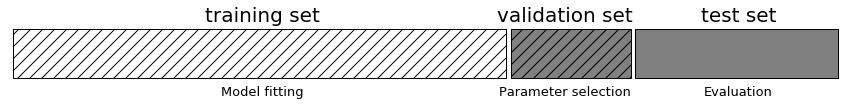

In [22]:
mglearn.plots.plot_threefold_split()

In [23]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}, size of validation set: {},size of test set: {}\n".format(
    X_train.shape[0], 
    X_valid.shape[0], 
    X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)

#[NOTE] 훈련 데이터와 검증 데이터를 합쳐서 다시 모델을 구성함
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84, size of validation set: 28,size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


#### 5.2.3 Grid-search with cross-validation
- 그리드 탐색에서도 교차 검증 필요
  - 위 두 예제에서 최고의 성능을 보여주는 파라미터가 변경된 점을 주의
  - cross_val_score 사용

In [24]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}, size of validation set: {},size of test set: {}\n".format(
    X_train.shape[0], 
    X_valid.shape[0], 
    X_test.shape[0]))

# reference: manual_grid_search_cv
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)

#[NOTE] 훈련 데이터와 검증 데이터를 합쳐서 다시 모델을 구성함
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84, size of validation set: 28,size of test set: 38

Best score on validation set: 0.97
Best parameters:  {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

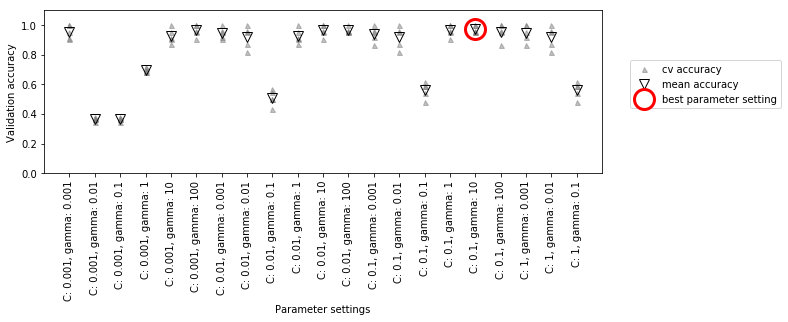

In [25]:
mglearn.plots.plot_cross_val_selection()

![process](./images/process.jpg)

- **model_selection.GridSearchCV**
  - <u>**교차 검증을 사용하는 그리드 탐색을 통한 모델 파라미터 검색 기능 제공 객체**</u>
  - 기본적으로 사용하는 교차 검증 분류기
    - 분류에는 StratifiedKFold 사용함
    - 회귀에는 KFold 사용함
  - fit을 수행한 이후에는 가장 최적의 파라미터로 만들어진 모델을 구성하고 있음.
- 다른 estimator (or 모델)를 사용하여 만들어지는 estimator를 메타 추정기(meta-estimator)라고 함.
  - GridSearchCV는 가장 널리 사용되는 메타 추정기
  - scikit-learn에서는 MetaEstimatorMixin 클래스를 상속한 모델을 메타 추정기라고 부름
  - 메타 추정기 예
    - GridSearchCV
    - RandomForest
    - GradientBoosting
    - RFE
    - ...
    
- 우선 모델에 들어갈 각 매개변수 값을 사전(Dict)타입으로 구성
  - 문자열 매개변수 이름을 모델(예:SVC)에 설정된 매개변수와 동일하게 맞춤  

In [26]:
param_grid = {    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

estimator = SVC()
grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

estimator = SVC()

param_grid = {    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    estimator = estimator, 
    param_grid = param_grid, 
    n_jobs = -1, 
    cv = 5, 
    return_train_score = True
)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [31]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
pd.options.display.float_format = '{:,.7f}'.format

print(results.columns)
# show the first 5 rows
# display(results.head(5))
display(results)

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_gamma', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,...,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518
1,0.0062447,0.0000000,0.3660714,0.3660787,...,0.0076481,0.0000000,0.0113708,0.0028518
2,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518
3,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518
4,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518
5,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518
6,0.0031217,0.0031217,0.3660714,0.3660787,...,0.0062433,0.0062433,0.0113708,0.0028518
7,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518
8,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518
9,0.0000000,0.0000000,0.3660714,0.3660787,...,0.0000000,0.0000000,0.0113708,0.0028518


In [32]:
results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
31,1,"{'C': 100, 'gamma': 0.01}",0.9732143,0.0223995,0.9843684,0.0054851
20,2,"{'C': 1, 'gamma': 0.1}",0.9642857,0.0340769,0.9776501,0.0100842
30,2,"{'C': 100, 'gamma': 0.001}",0.9642857,0.0340769,0.9776757,0.0070319
26,2,"{'C': 10, 'gamma': 0.1}",0.9642857,0.0177687,0.9865662,0.0083555
25,2,"{'C': 10, 'gamma': 0.01}",0.9642857,0.0340769,0.9776757,0.0070319
32,6,"{'C': 100, 'gamma': 0.1}",0.9553571,0.0495662,0.9887884,0.0099945
15,6,"{'C': 0.1, 'gamma': 1}",0.9553571,0.0401043,0.9598457,0.0113043
33,8,"{'C': 100, 'gamma': 1}",0.9464286,0.0519227,1.0000000,0.0000000
21,8,"{'C': 1, 'gamma': 1}",0.9464286,0.0324799,0.9843928,0.0088664
27,10,"{'C': 10, 'gamma': 1}",0.9375000,0.0452528,0.9865906,0.0083624


[0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.36607142857142855, 0.6964285714285714, 0.9196428571428571, 0.9553571428571429, 0.36607142857142855, 0.36607142857142855, 0.6964285714285714, 0.9285714285714286, 0.9642857142857143, 0.9464285714285714, 0.9196428571428571, 0.5089285714285714, 0.9285714285714286, 0.9642857142857143, 0.9642857142857143, 0.9375, 0.9196428571428571, 0.5625, 0.9642857142857143, 0.9732142857142857, 0.9553571428571429, 0.9464285714285714, 0.9196428571428571, 0.5625]

(36,)


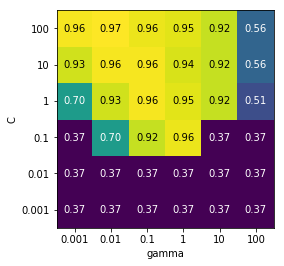

In [33]:
print([x for x in results.mean_test_score])
print()

print(results.mean_test_score.shape)

scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(
    scores, 
    xlabel='gamma', 
    xticklabels=param_grid['gamma'],
    ylabel='C', 
    yticklabels=param_grid['C'], 
    cmap="viridis"
)

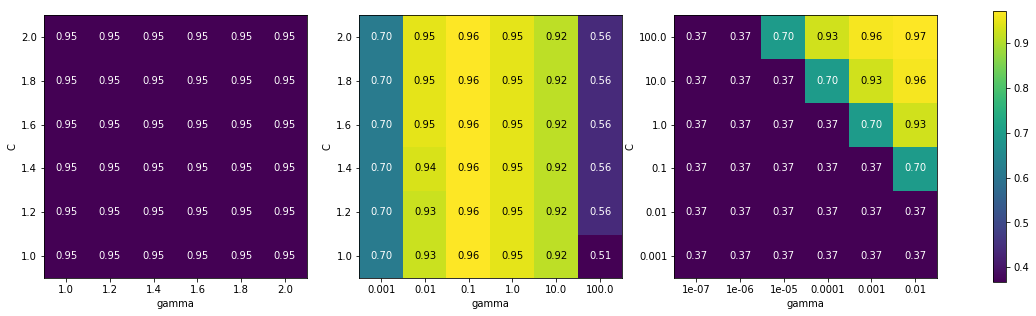

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

param_grid_linear  = {'C': np.linspace(1, 2, 6),  'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),  'gamma':  np.logspace(-3, 2, 6)}
param_grid_range   = {'C': np.logspace(-3, 2, 6), 'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [35]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [36]:
grid_search = GridSearchCV(SVC(), param_grid, n_jobs=-1, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
results = pd.DataFrame(grid_search.cv_results_)

results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
39,1,"{'C': 1, 'kernel': 'linear'}",0.9732143,0.0223995,0.9843684,0.0054851
31,1,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9732143,0.0223995,0.9843684,0.0054851
20,3,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776501,0.0100842
30,3,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776757,0.0070319
26,3,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.9642857,0.0177687,0.9865662,0.0083555
25,3,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.9642857,0.0340769,0.9776757,0.0070319
40,3,"{'C': 10, 'kernel': 'linear'}",0.9642857,0.0338387,0.9888134,0.0070280
41,3,"{'C': 100, 'kernel': 'linear'}",0.9642857,0.0338387,0.9932579,0.0055055
32,9,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.9553571,0.0495662,0.9887884,0.0099945
15,9,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.9553571,0.0401043,0.9598457,0.0113043


#### Using different cross-validation strategies with grid-search
- GridSearchCV의 인자인 cv에 스스로 정의한 다음과 같은 교차 검증 분할기 제공
  - KFold(n_splits=5)   
  - StratifiedKFold(n_splits=5)
  - ShuffleSplit(n_splits=5)
  - StratifiedShuffleSplit(n_splits=5)
- n_splits=1을 사용하는 경우
  - 훈련 데이터 세트와 검증 데이터 세트로의 분리를 한번 만 수행
  - 데이터셋이 매우 크거나 모델 구축 시간이 오래 걸릴 때 사용하는 전략

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(test_size=.8, n_splits=1)
grid_search = GridSearchCV(SVC(), param_grid, cv=shuffle_split, return_train_score=True)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
results = pd.DataFrame(grid_search.cv_results_)

results2 = results[['rank_test_score', 'params', 'mean_test_score', 'std_test_score', 
                    'mean_train_score', 'std_train_score']]
results2 = results2.sort_values('rank_test_score')
display(results2)

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.99


,rank_test_score,params,mean_test_score,std_test_score,mean_train_score,std_train_score
39,1,"{'C': 1, 'kernel': 'linear'}",0.9888889,0.0000000,1.0000000,0.0000000
40,1,"{'C': 10, 'kernel': 'linear'}",0.9888889,0.0000000,1.0000000,0.0000000
20,3,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.9777778,0.0000000,0.9090909,0.0000000
31,3,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",0.9777778,0.0000000,0.9545455,0.0000000
30,3,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.9777778,0.0000000,0.9545455,0.0000000
26,3,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.9777778,0.0000000,0.9545455,0.0000000
25,3,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.9777778,0.0000000,0.9545455,0.0000000
32,8,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.9666667,0.0000000,1.0000000,0.0000000
38,9,"{'C': 0.1, 'kernel': 'linear'}",0.9555556,0.0000000,0.8636364,0.0000000
33,9,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}",0.9555556,0.0000000,1.0000000,0.0000000


#### Nested cross-validation
- 지금까지 살펴본 코드들의 단점
  - 처음에 원본 데이터들을 훈련 데이터와 테스트 데이터로 **한번만** 나누고 있음.
  - 원본 데이터를 훈련 데이터와 테스트 데이터로 나누는 시점도 교차 검증화 시킬 수 있음 --> **중첩 교차 검증**
- **중첩 교차 검증**
  - outer_scores = []
  - 1st Loop: 원본 데이터를 훈련(Training) 데이터와 테스트(Test) 데이터로 분리 및 순회
    - best_params = {}
    - best_score = -np.inf
    - 2nd Loop: 매개변수 그리드를 순회
      - 3rd Loop: 훈련 데이터를 다시 훈련(Training) 데이터와 검증(Validation) 데이터로 분리
      - 3rd Loop의 결과 모델을 평가하여 best_params 및 best_score 조정
    - best_params와 함께 모델 구성하여 평가결과를 outer_scores에 저장
    
    
    
![process](./images/nestedkfold.jpg)

In [39]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
scores = cross_val_score(grid_search, iris.data, iris.target, n_jobs=-1, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001


In [40]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    outer_best_params = []
    
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test part)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf

        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []

            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)

                # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters

        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])

        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
        outer_best_params.append(best_params)
    return np.array(outer_scores), outer_best_params

In [41]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores, params = nested_cv(
    iris.data, 
    iris.target, 
    StratifiedKFold(5), 
    StratifiedKFold(5), 
    SVC,
    ParameterGrid(param_grid)
)

print("Cross-validation scores: {}".format(scores))
print("Mean cross-validation score: ", scores.mean())
print("best params: {}".format(params))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001
best params: [{'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.01}]
